<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/2.4_probcond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 2.4 indipendenza, Probabilità Condizionata e teorema di Bayes
___________

Addattamento da: 
- Probability and Statistics for Computer Scientists, M. Baron, CRC Press, 2014
- Probability for Computer Science, D. Forsyth, Springer Nature, 2018


Supponiamo di dover incontrare qualcuno all'aeroporto. È probabile che il volo arrivi in orario; la probabilità di ciò è $ 0.8 $. Improvvisamente viene annunciato che il volo è partito con un'ora di ritardo rispetto al programma. Ora la probabilità che arrivi in orario è soltanto $ 0.05 $. La nuova informazione ha modificato la probabilità di incontrare questo volo in orario. Tale nuova probabilità prende il nome di **probabilità condizionata**, dove la nuova informazione — che il volo è partito in ritardo — rappresenta la **condizione**.


> **DEFINIZIONE 2.15**  La probabilità condizionata dell'**evento** $ A $ dato l'**evento** $ B $ è la probabilità che $ A $ si verifichi quando si sa che $ B $ si è verificato.

Notazione  
$ P (A \mid B) = $ probabilità condizionata di $ A $ dato $ B $

La probabilità condizionata è un concetto fondamentale che ci permette di rispondere a domande del tipo: "Qual è la probabilità di un evento, dato che sappiamo che un altro evento è già accaduto?"



#### Diagrammi di Venn

I diagrammi di Venn forniscono un'interpretazione visiva molto intuitiva della probabilità condizionata:

1. L'intero rettangolo rappresenta lo spazio campione $\Omega$
2. Quando condizioniamo su $\mathcal{B}$, è come se "zoomassimo" sull'area di $\mathcal{B}$, come se lo spazio campione si ridefinisse per diventare $\mathcal{B}$ il nuovo spazio campione.
3. $P(\mathcal{A}|\mathcal{B})$ è la proporzione dell'area di $\mathcal{B}$ che è anche in $\mathcal{A}$

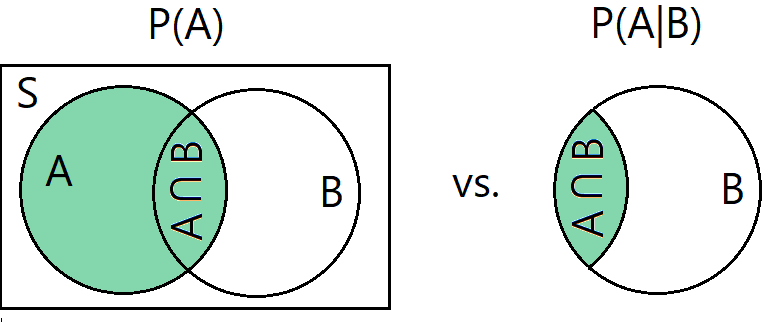

#### Definizione frequentista della probabilità:

Facciamo una parentesi per parlare della definizione frequentista della probabilità, che è la seguente: 

Dato un esperimento, la probabilità di un determinato esito $\omega$ di E si dice essere $P(\omega)$ e consiste nella _frequenza relativa_ con cui $\omega$ si verifica quando si ripete l'esperimento un numero molto elevato di volte. 

Questa definizione non è sempre utile, perché ci sono "esperimenti" che non possiamo ripetere un numero molto elevato di volte. (Per esempio, l'esperimento che verifica se nei prossimi 10 anni ci sarà un terremoto a Varese).

Supponiamo di ripetere un esperimento $N$ volte, e che ogni ripetizione dell'esperimento non influenzi le altri. La definizione frequentista ci direbbe che, in questo caso, un esito $\omega$ ha probabilità $0<P\leq1$ se:

1.   l'esito $\omega$ si verifica in circa in $NP$ occasioni, e, man mano che $N$ si avvicina a $\infty$, il numero di volte in cui l'esito $\omega$ si verifica è sempre più precisamente pari a $NP$.
2. Al crescere di $N$, la *frazione* di esperimenti in cui si verifica il risultato $\omega$ si avvicina a $P$.

Scriviamo $\#\omega$ per indicare il numero di volte in cui si verifica l'esito $\omega$. Interpretiamo quindi $P$ come:

$$ P = \lim_{N \to \infty} \frac{\# \omega}{N}$$

Da questa equazione possiamo subito notare due cose:

1. Per qualsiasi esito $\omega$ (ben definito), si ha che: $ 0 < P(\omega) \leq 1 $ [ Ricorda, se $P(\omega)=0$ tecnicamente $\omega$ non sarebbe un esito dell'esperimento. ]
2. Se denotiamo ogni esito possibile in $\Omega$ con $\omega_i$, allora averemmo che:  $\sum_{\omega_i \in \Omega} P(\omega_i) = 1 $

Ricordate che ogni esecuzione dell'esperimento **produce esattamente un esito**. Le probabilità sommano uno perché ogni esecuzione deve avere uno dei risultati presenti nello spazio campionario.

Come abbiamo visto nel capitolo 2.3, alcuni problemi possono essere gestiti costruendo un insieme di esiti e ragionando semplicemente sulla cardinalità di $\Omega$: . Questo accade quando i risultati hanno la stessa probabilità.

#### Interpretazione frequentista della probabilità condizionata


Pensando alla definizione frequentista di probabilità, al probabibilità condizionata di un esito $\mathcal{A}$ dato un esito $\mathcal{B}$ può capire più intuitivamente:

- Se in 100 lanci di due dadi, otteniamo 36 volte un numero pari (Chiamiamolo evento $\mathcal{B}$)
- E di queste 36 volte, 18 volte abbiamo che il primo dado era 6 (Chiamiamolo evento $\mathcal{A}$)
- Allora la probabilità condizionata di $\mathcal{A}$ dato $\mathcal{B}$ sarebbe $P(\mathcal{A}|\mathcal{B}) = \frac{18}{36} = 0.5$.

Vedete come la probabilità condizionata di $\mathcal{A}$ è una sempre una proporzione? Non è più la proporzione tra l'area di $\mathcal{B}$ e l'area di $\Omega$, ma la proporzione tra l'area di $\mathcal{A} \cap \mathcal{B}$ e l'area di $\mathcal{B}$.

> **Esempio (BONUS):** Consideriamo un mazzo di 52 carte:
- Sia $\mathcal{A}$ l'evento "estrarre un asso"
- Sia $\mathcal{B}$ l'evento "estrarre una carta di cuori"

Allora:
- $P(\mathcal{A}) = \frac{4}{52} = \frac{1}{13}$
- $P(\mathcal{B}) = \frac{13}{52} = \frac{1}{4}$
- $P(\mathcal{A} \cap \mathcal{B}) = \frac{1}{52}$ (l'asso di cuori)

La probabilità di estrarre un asso, dato che sappiamo che la carta è di cuori:

$$P(\mathcal{A}|\mathcal{B}) = \frac{P(\mathcal{A} \cap \mathcal{B})}{P(\mathcal{B})} = \frac{\frac{1}{52}}{\frac{13}{52}} = \frac{1}{13}$$

Questo risultato è intuitivo: tra le 13 carte di cuori, solo una è un asso.


#### Interpretazione classica della probabilità condizionata:

Consideriamo innanzitutto il caso di **esiti equiprobabili**. Alla luce della nuova informazione — ovvero che si è verificato l'**esito** $ B $ — soltanto gli esiti contenuti in $ B $ hanno ancora una probabilità non nulla di verificarsi. Contando solo tali esiti, la probabilità non condizionata di $ A $,

$$
P (A) = \frac{\text{numero di esiti in } A}{\text{numero di esiti in } \Omega},
$$

viene ora sostituita dalla "_probabilità condizionata di $ A $ dato $ B $"_:

$$
P (A \mid B) = \frac{\text{numero di esiti in } A \cap B}{\text{numero di esiti in } B} = \frac{P (A \cap B)}{P (B)}.
$$

Questa risulta essere la formula generale:



**Probabilità Condizionata**
$$
P (A \mid B) = \frac{P (A \cap B)}{P (B)} \tag{2.7}
$$

Riscrivendo la (2.7) in forma diversa, otteniamo la formula generale per la probabilità dell'intersezione.

**Probabilità dell'intersezione, caso generale**

$$
P (A \cap B) = P (B) \, P (A \mid B) \tag{2.8}
$$

La probabilità dell'intersezione viene anche chiamata _"**Regola del prodotto**"_.


Osserviamo come, per qualsiasi evento $\mathcal{E}$:

$$\frac{P(\mathcal{E} \cap \mathcal{B})}{P(\mathcal{B})} = P(\mathcal{E}|\mathcal{B})$$

Questo significa che, nel regime "condizionato" le "proporzioni" degli eventi all'interno di $\mathcal{B}$ rimangono le stesse, solo che esse vengono _riscalate_ per sommare a 1. In altre parole, quando sappiamo che $\mathcal{B}$ si è verificato, cioè quando condizioniamo su $\mathcal{B}$, creiamo un nuovo spazio di probabilità dove:

1. $P(\mathcal{B}|\mathcal{B}) = 1$ (certezza, $\mathcal{B}$ è nostro nuovo spazio campione )
2. Quindi per eventi disgiunti $\mathcal{C}$ e $\mathcal{D}$ avremo:
   $$P(\mathcal{C} \cup \mathcal{D}|\mathcal{B}) = P(\mathcal{C}|\mathcal{B}) + P(\mathcal{D}|\mathcal{B})$$

#### La Regola del Prodotto

Per due eventi $\mathcal{A}$ e $\mathcal{B}$, la probabilità congiunta può essere espressa come:

$$P(\mathcal{A} \cap \mathcal{B}) = P(\mathcal{B}) \cdot P(\mathcal{A}|\mathcal{B}) = P(\mathcal{A}) \cdot P(\mathcal{B}|\mathcal{A})$$

Per più eventi, questa regola si estende:

$$P(\mathcal{A} \cap \mathcal{B} \cap \mathcal{C}) = P(\mathcal{A}) \cdot P(\mathcal{B}|\mathcal{A}) \cdot P(\mathcal{C}|\mathcal{A} \cap \mathcal{B})$$

Questa scomposizione è particolarmente utile quando abbiamo una sequenza di eventi che seguono un ordine naturale o causale.

La regola del prodotto deriva direttamente dalla definizione di probabilità condizionata:

$$P(\mathcal{A}|\mathcal{B}) = \frac{P(\mathcal{A} \cap \mathcal{B})}{P(\mathcal{B})}$$

Riorganizzando questa equazione, otteniamo:

$$P(\mathcal{A} \cap \mathcal{B}) = P(\mathcal{B}) \cdot P(\mathcal{A}|\mathcal{B})$$


Grazie alla proprietà commutativa dell'intersezione ($\mathcal{A} \cap \mathcal{B} \cap \mathcal{C} = \mathcal{B} \cap \mathcal{A} \cap \mathcal{C}$ etc.), possiamo decomporre la probabilità congiunta di tre eventi in diversi modi, tutti equivalenti:

$$ P(\mathcal{A} \cap \mathcal{B} \cap \mathcal{C}) = P(\mathcal{A}) \cdot P(\mathcal{B}|\mathcal{A}) \cdot P(\mathcal{C}|\mathcal{A} \cap \mathcal{B}) $$

oppure:

$$ P(\mathcal{A} \cap \mathcal{B} \cap \mathcal{C}) = P(\mathcal{B}) \cdot P(\mathcal{A}|\mathcal{B}) \cdot P(\mathcal{C}|\mathcal{A} \cap \mathcal{B}) $$

o ancora:

$$ P(\mathcal{A} \cap \mathcal{B} \cap \mathcal{C}) = P(\mathcal{C}) \cdot P(\mathcal{A}|\mathcal{C}) \cdot P(\mathcal{B}|\mathcal{A} \cap \mathcal{C}) $$

E così via.



Riesci a capire in quanti modi si può *fattorizzare* questa probabilità congiunta?

Per calcolare il numero totale di decomposizioni possibili, osserviamo che:

- Possiamo scegliere qualsiasi evento come primo termine (3 scelte)
- Dei due eventi rimanenti, possiamo scegliere qualsiasi come secondo termine (2 scelte)
- Così facendo, l'ultimo evento sarà automaticamente determinato (1 scelta)

Per ogni sequenza di eventi, possiamo condizionare il secondo evento sul primo e il terzo sui primi due

Quindi il numero totale di decomposizioni è:
$3! = 6$ decomposizioni diverse

Esplicitamente, sono:

$$
\begin{align}
& P(\mathcal{A}) \cdot P(\mathcal{B}|\mathcal{A}) \cdot P(\mathcal{C}|\mathcal{A} \cap \mathcal{B}) \\
& P(\mathcal{A}) \cdot P(\mathcal{C}|\mathcal{A}) \cdot P(\mathcal{B}|\mathcal{A} \cap \mathcal{C}) \\
& P(\mathcal{B}) \cdot P(\mathcal{A}|\mathcal{B}) \cdot P(\mathcal{C}|\mathcal{A} \cap \mathcal{B}) \\
& P(\mathcal{B}) \cdot P(\mathcal{C}|\mathcal{B}) \cdot P(\mathcal{A}|\mathcal{B} \cap \mathcal{C}) \\
& P(\mathcal{C}) \cdot P(\mathcal{A}|\mathcal{C}) \cdot P(\mathcal{B}|\mathcal{A} \cap \mathcal{C}) \\
& P(\mathcal{C}) \cdot P(\mathcal{B}|\mathcal{C}) \cdot P(\mathcal{A}|\mathcal{B} \cap \mathcal{C})
\end{align}$$


Questa molteplicità di decomposizioni ci offre flessibilità nella risoluzione di problemi: possiamo scegliere la **decomposizione più conveniente in base alle informazioni disponibili nel problema specifico.**


> Esempio: Estrazione di Carte
Consideriamo l'estrazione di due carte da un mazzo standard di 52 carte senza reinserimento.

Qual è la probabilità di estrarre due assi?

1. Prima estrazione ($\mathcal{A}_1$): $P(\mathcal{A}_1) = \frac{4}{52} = \frac{1}{13}$
2. Seconda estrazione ($\mathcal{A}_2$), dato che abbiamo già estratto un asso:
   $P(\mathcal{A}_2|\mathcal{A}_1) = \frac{3}{51} = \frac{1}{17}$

La probabilità di estrarre due assi è quindi:

$$P(\mathcal{A}_1 \cap \mathcal{A}_2) = \frac{1}{13} \cdot \frac{1}{17} = \frac{1}{221}$$

Si noti che questi eventi non sono indipendenti!



> Esempio: Lancio di Dadi
Lanciamo due dadi. Qual è la probabilità di ottenere un 6 sul primo dado e un numero pari sul secondo?

1. Primo evento ($\mathcal{D}_6$): ottenere 6 sul primo dado
   $P(\mathcal{D}_6) = \frac{1}{6}$
2. Secondo evento ($\mathcal{P}$): ottenere un numero pari sul secondo dado
   $P(\mathcal{P}|\mathcal{D}_6) = \frac{3}{6} = \frac{1}{2}$ (i due eventi sono indipendenti)

$$P(\mathcal{D}_6 \cap \mathcal{P}) = \frac{1}{6} \cdot \frac{1}{2} = \frac{1}{12}$$



> Esempio: Esempio con Tre Eventi
Consideriamo un processo di controllo qualità con tre fasi:

1. $\mathcal{M}$: il materiale passa il controllo iniziale
2. $\mathcal{D}$: il design è approvato
3. $\mathcal{T}$: il test finale è superato

Supponiamo:
- $P(\mathcal{M}) = 0.9$ (90% dei materiali passa il controllo)
- $P(\mathcal{D}|\mathcal{M}) = 0.8$ (80% dei design con materiali approvati passa)
- $P(\mathcal{T}|\mathcal{M} \cap \mathcal{D}) = 0.95$ (95% dei prodotti con materiali e design approvati passa il test finale)

La probabilità che un prodotto superi tutte e tre le fasi è:

$$P(\mathcal{M} \cap \mathcal{D} \cap \mathcal{T}) = 0.9 \cdot 0.8 \cdot 0.95 = 0.684$$


#### Applicazioni della regola del prodotto

La regola del prodotto è fondamentale in molti campi:

1. **Analisi dei Rischi**: Calcolare la probabilità di una serie di eventi che devono verificarsi tutti per un fallimento del sistema
2. **Machine Learning**: Nella costruzione di modelli probabilistici, come le catene di Markov, tanto usate per il decision making sequenziale e la massimizzazione di profitto a lungo periodo.
3. **Genetica**: Calcolare la probabilità di ereditare specifiche combinazioni di geni.

#### Indipendenza
Avevamo parlato dell'indipendenza di due eventi quando abbiamo toccato il discordo della probabilità congiunta. La definizione era piuttosto assettica, perché dava conto solo di una condizione matematica (due eventi sono indipendenti solo se la probabilità della loro intersezione coincide con il prodotto delle loro probabilità). Ora però, alla luce del concetto di probabilità condizionata, possiamo fornire una definizione di indipendenza che risulta molto chiara intuitivamente.

> **DEFINIZIONE 2.16** Gli **eventi** $ A $ e $ B $ sono indipendenti se il verificarsi di $ B $ non influenza la probabilità di $ A $, cioè,

$$
P (A \mid B) = P (A).
$$

Secondo questa definizione, nel caso di **eventi** indipendenti la probabilità condizionata coincide con la probabilità non condizionata. Sostituendo questa uguaglianza nella (2.8), otteniamo
$$
P (A \cap B) = P (A) \, P (B).
$$

E questa è la nostra vecchia formula per **eventi** indipendenti.

> **Esempi di Eventi Indipendenti**

1. **Lancio di due dadi**
   - Evento $\mathcal{A}$: ottenere 6 sul primo dado
   - Evento $\mathcal{B}$: ottenere un numero pari sul secondo dado
   - Sono indipendenti perché il risultato di un dado non influenza l'altro

2. **Estrazioni con reimmissione**
   - Evento $\mathcal{A}$: estrarre una pallina rossa
   - Rimettere la pallina nell'urna
   - Evento $\mathcal{B}$: estrarre una pallina blu
   - Sono indipendenti perché la prima estrazione non cambia la composizione dell'urna

3. **Meteorologia e Matematica**
   - Evento $\mathcal{A}$: piove domani
   - Evento $\mathcal{B}$: uno studente supera un esame di matematica
   - Sono indipendenti perché non c'è alcuna relazione causale tra i due eventi



> **Esempi di Eventi Dipendenti**

1. **Estrazioni senza reimmissione**
   - Evento $\mathcal{A}$: estrarre un asso da un mazzo di carte
   - Evento $\mathcal{B}$: estrarre un altro asso dallo stesso mazzo
   - Sono dipendenti perché la prima estrazione cambia la probabilità della seconda

2. **Test medici**
   - Evento $\mathcal{A}$: avere una certa malattia
   - Evento $\mathcal{B}$: risultato positivo al test per quella malattia
   - Sono dipendenti perché avere la malattia influenza fortemente la probabilità di un test positivo

3. **Rendimento scolastico**
   - Evento $\mathcal{A}$: studiare per un esame
   - Evento $\mathcal{B}$: superare quell'esame
   - Sono dipendenti perché studiare aumenta la probabilità di superare l'esame

> **Esempio 2.31.** Il novanta percento dei voli parte in orario. L’ottanta percento dei voli arriva in orario. Il settantacinque percento dei voli parte in orario e arriva in orario.

(a) Stai aspettando un volo che è partito in orario. Qual è la probabilità che arrivi in orario?  
(b) Hai incontrato un volo, e questo è arrivato in orario. Qual è la probabilità che fosse partito in orario?  
(c) Gli **eventi** “partire in orario” e “arrivare in orario” sono indipendenti?

**Soluzione.** Denotiamo gli **eventi**:

$$
A = (\text{arrivo in orario}), \quad D = (\text{partenza in orario}).
$$

Sappiamo che:

$$
P (A) = 0.8, \quad P (D) = 0.9, \quad P (A \cap D) = 0.75.
$$

(a)  
$$
P (A \mid D) = \frac{P (A \cap D)}{P (D)} = \frac{0.75}{0.9} = 0.8333.
$$

(b)  
$$
P (D \mid A) = \frac{P (A \cap D)}{P (A)} = \frac{0.75}{0.8} = 0.9375.
$$

(c) Gli **eventi** non sono indipendenti perché

$$
P (A \mid D) \ne P (A), \quad P (D \mid A) \ne P (D), \quad P (A \cap D) \ne P (A) P (D).
$$

In realtà, basta una sola di queste disuguaglianze per dimostrare che $ A $ e $ D $ sono dipendenti.  
Inoltre, osserviamo che $ P (A \mid D) > P (A) $ e $ P (D \mid A) > P (D) $. In altre parole, partire in orario aumenta la probabilità di arrivare in orario, e viceversa. Questo risultato è perfettamente in accordo con l’intuizione.

#### Eventi Disgiunti (Mutuamente Esclusivi) e dipendenza

Sappiamo che due eventi sono disgiunti se non possono verificarsi contemporaneamente. Si ha che eventi disgiunti sono sempre dipendenti. Perché? Per come sono definiti gli eventi disgiunti, se so che si è verificato $\mathcal{A}$, so con certezza che $\mathcal{B}$ non può verificarsi Quindi, $\mathcal{A}$ influenza decisamente la probabilità di $\mathcal{B}$

> Esempio di Eventi Disgiunti nel lancio di un dado
   - Evento $\mathcal{A}$: ottenere un numero pari
   - Evento $\mathcal{B}$: ottenere un numero dispari
   - Sapendo che è uscito pari, la probabilità di dispari diventa zero

> Ricorda: Due eventi $A$ e $B$ sono indipendenti se e solo se:

  $$P(A \cap B) = P(A) \cdot P(B)$$



#### Proprietà fondamentali dell indipendenza

1. Se $A$ e $B$ sono indipendenti, allora:
   - $A$ e $B^c$ sono indipendenti
   - $A^c$ e $B$ sono indipendenti
   - $A^c$ e $B^c$ sono indipendenti

2. La probabilità condizionata di eventi indipendenti rimane invariata:
   $$P(A|B) = P(A) \quad \text{e} \quad P(B|A) = P(B)$$

3. La disgiunzione implica **DIPENDENZA** (o non indipendenza): Eventi disgiunti ($A \cap B = \emptyset$) con probabilità non nulla sono sempre dipendenti.



#### Generalizzazione a più eventi

Tre eventi $A$, $B$ e $C$ sono mutualmente indipendenti se:
- $P(A \cap B) = P(A) \cdot P(B)$
- $P(A \cap C) = P(A) \cdot P(C)$
- $P(B \cap C) = P(B) \cdot P(C)$
- $P(A \cap B \cap C) = P(A) \cdot P(B) \cdot P(C)$

> Esempio

Nel lancio di due dadi:
- Sia $A$ l'evento "il primo dado mostra 6"
- Sia $B$ l'evento "il secondo dado mostra 6"

Questi eventi sono indipendenti poiché:
- $P(A) = \frac{1}{6}$
- $P(B) = \frac{1}{6}$
- $P(A \cap B) = \frac{1}{36} = \frac{1}{6} \cdot \frac{1}{6} = P(A) \cdot P(B)$

#### Il Teorema della Probabilità Totale

Questa legge mette in relazione la probabilità incondizionata di un esito $ A $ con le sue probabilità condizionate. Viene utilizzata ogni volta che è più semplice calcolare le probabilità condizionate di $ A $ sulla base di informazioni aggiuntive.


> **Ricorda**: il concetto di Partizione

Una partizione dello spazio campionario $\Omega$ è un insieme di eventi $\{\mathcal{B}_1, \mathcal{B}_2, ..., \mathcal{B}_n\}$ tali che:
1. Sono mutuamente esclusivi: $\mathcal{B}_i \cap \mathcal{B}_j = \emptyset$ per $i \neq j$
2. Sono esaustivi: $\bigcup_{i=1}^n \mathcal{B}_i = \Omega$
3. Sono non vuoti: $P(\mathcal{B}_i) > 0$ per ogni $i$

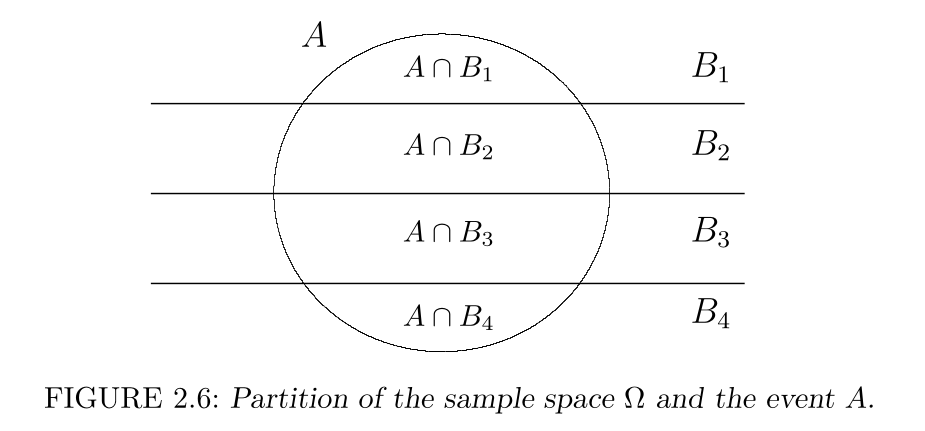


Consideriamo una partizione dello spazio campione $ \Omega $ in eventi $ B_1, \ldots, B_k $ mutuamente esclusivi ed esaustivi. Ciò significa che

$$ B_i \cap B_j = \emptyset \quad \text{per ogni } i \neq j \quad \text{e} \quad B_1 \cup \ldots \cup B_k = \Omega. $$

Questi eventi partizionano anche l'evento $ A $:

$$ A = (A \cap B_1) \cup \ldots \cup (A \cap B_k), $$

e questa è anch'essa un'unione di eventi mutuamente esclusivi (Figura 2.6). Di conseguenza,

$$ P(A) = \sum_{j=1}^{k} P(A \mid B_j) P(B_j), $$

e si ottiene la seguente regola.


> **Teorema della probabilità totale:**

Per qualsiasi evento $\mathcal{A}$ e per qualsiasi partizione $\{\mathcal{B}_1, \mathcal{B}_2, ..., \mathcal{B}_n\}$ si ha che:

$$P(\mathcal{A}) = \sum_{i=1}^n P(\mathcal{A}|\mathcal{B}_i) \cdot P(\mathcal{B}_i) \tag{2.10} $$

Questo teorema ci permette di calcolare la probabilità di un evento scomponendola attraverso una partizione dello spazio campionario.


Nel caso di due eventi ($ k = 2 $),

$$
P(A) = P(A \mid B) P(B) + P\left(A \mid \overline{B}\right) P\left(\overline{B}\right).
$$

#### Teorema di Bayes

L'esempio 2.31 mostra che due probabilità condizionate, $ P(A \mid B) $ e $ P(B \mid A) $, in generale non sono uguali. Consideriamo un altro esempio.

> **Esempio 2.32 (Affidabilità di un test)**. Esiste un test per una certa infezione virale (incluso un attacco di virus su una rete informatica). Il test è affidabile al 95% per i pazienti infetti e al 99% per i soggetti sani. Cioè, se un paziente ha il virus (evento $ V $), il test lo rivela (evento $ S $) con probabilità condizionata $ P(S \mid V) = 0.95 $, e se il paziente non ha il virus, il test conferma che è sano con probabilità condizionata $ P(S \mid \overline{V}) = 0.99 $, dove $ \overline{V} $ indica l'evento complementare a $ V $ (il paziente non è infetto).

Consideriamo un paziente il cui risultato del test è positivo (ossia, il test indica che il paziente ha il virus). Sapendo che talvolta il test può essere errato, naturalmente il paziente desidera conoscere la probabilità che effettivamente abbia il virus. Tuttavia, questa probabilità condizionata, $ P(V \mid S) $, non è indicata tra le caratteristiche fornite del test.

♦

Questo esempio si applica a ogni procedura di test, inclusi test di software e hardware, test di gravidanza, test di paternità, test dell’alcol, esami accademici, ecc. Il problema consiste nel collegare la probabilità condizionata nota $ P(S \mid V) $ con la quantità richiesta $ P(V \mid S) $. Tale collegamento fu stabilito nel XVIII secolo dal ministro inglese Thomas Bayes (1702–1761) nel modo seguente.

Osserviamo che $ A \cap B = B \cap A $. Di conseguenza, usando l'equazione (2.8), otteniamo:

$$ P(B) \, P(A \mid B) = P(A) \, P(B \mid A) $$

Risolvendo rispetto a $ P(B \mid A) $, si ottiene il

> **Teorema di Bayes**

$$ P(B \mid A) = \frac{P(A \mid B) \, P(B)}{P(A)} \quad (2.9) $$


#### Il Teorema di Bayes e l'inferenza



L'inferenza è il processo di trarre conclusioni partendo da premesse o evidenze. Nel contesto probabilistico, spesso vogliamo:
1. Capire la causa di un effetto osservato
2. Prevedere effetti futuri basandoci su cause note

La probabilità condizionata è fondamentale in questo processo perché ci permette di aggiornare le nostre credenze alla luce di nuove informazioni.


> **Esempio**: Diagnosi Medica
- Causa ($\mathcal{D}$): presenza di una malattia
- Effetto ($\mathcal{S}$): presenza di un sintomo

Conosciamo:
- $P(\mathcal{D})$: probabilità a priori della malattia
- $P(\mathcal{S}|\mathcal{D})$: probabilità del sintomo data la malattia (verosimiglianza)

Vogliamo:
- $P(\mathcal{D}|\mathcal{S})$: probabilità della malattia dato il sintomo (probabilità a posteriori)

**Componenti Chiave**

1. **Probabilità a priori** $P(\mathcal{H})$: la nostra credenza iniziale su un'ipotesi
2. **Verosimiglianza** $P(\mathcal{E}|\mathcal{H})$: probabilità dell'evidenza data l'ipotesi
3. **Probabilità a posteriori** $P(\mathcal{H}|\mathcal{E})$: la credenza aggiornata dopo aver osservato l'evidenza

**Formula del teorema di Bayes**

$$P(\mathcal{H}|\mathcal{E}) = \frac{P(\mathcal{E}|\mathcal{H}) \cdot P(\mathcal{H})}{P(\mathcal{E})}$$

dove $P(\mathcal{E})$ può essere calcolato usando il teorema della probabilità totale:

$$P(\mathcal{E}) = P(\mathcal{E}|\mathcal{H}) \cdot P(\mathcal{H}) + P(\mathcal{E}|\neg\mathcal{H}) \cdot P(\neg\mathcal{H})$$




**Interpretazione**
Il teorema di Bayes ci fornisce un metodo formale per:
1. Aggiornare le nostre credenze alla luce di nuove evidenze
2. Invertire la direzione della probabilità condizionata (da effetto a causa)
3. Combinare informazioni a priori con nuovi dati

> Esempio Numerico
Consideriamo un test medico:
- $P(\mathcal{D}) = 0.01$ (1% della popolazione ha la malattia)
- $P(\mathcal{S}|\mathcal{D}) = 0.95$ (95% di sensibilità del test)
- $P(\mathcal{S}|\neg\mathcal{D}) = 0.10$ (10% di falsi positivi)

Usando Bayes:

$$P(\mathcal{D}|\mathcal{S}) = \frac{0.95 \cdot 0.01}{0.95 \cdot 0.01 + 0.10 \cdot 0.99} \approx 0.088$$

Quindi, anche con un test positivo, la probabilità di avere la malattia è solo circa 8.8%.


> **Esempio 2.33 (Situazione in un esame intermedio)**. In un esame intermedio, gli studenti X, Y e Z hanno dimenticato di firmare i loro compiti. Il professore sa che essi possono scrivere un buon esame con probabilità rispettivamente di 0.8, 0.7 e 0.5. Dopo la correzione, nota che due compiti senza firma sono buoni e uno è insufficiente. Dato questo fatto, e assumendo che gli studenti abbiano lavorato in modo indipendente, qual è la probabilità che il compito insufficiente appartenga allo studente Z?

**Soluzione**. Indichiamo con $ G $ un esame buono e con $ B $ un esame insufficiente. Inoltre, sia $ GGB $ l'evento "due esami buoni e uno insufficiente", $ XG $ l'evento "lo studente X ha scritto un esame buono", ecc. Dobbiamo calcolare $ P(ZB \mid GGB) $, sapendo che $ P(G \mid X) = 0.8 $, $ P(G \mid Y) = 0.7 $, e $ P(G \mid Z) = 0.5 $.

Applicando il teroema di Bayes:

$$ P(ZB \mid GGB) = \frac{P(GGB \mid ZB) \, P(ZB)}{P(GGB)} $$

Dato $ ZB $ (lo studente Z ha scritto un esame insufficiente), l'evento $ GGB $ si verifica solo se sia X che Y scrivono un esame buono. Dunque:

$$ P(GGB \mid ZB) = (0.8)(0.7) $$

L'evento $ GGB $ consiste di tre esiti distinti, a seconda di quale studente ha scritto l'esame insufficiente. Sommando le probabilità di questi esiti:

$$
P(GGB) = P(XG \cap YG \cap ZB) + P(XG \cap YB \cap ZG) + P(XB \cap YG \cap ZG)
$$
$$
= (0.8)(0.7)(0.5) + (0.8)(0.3)(0.5) + (0.2)(0.7)(0.5) = 0.47
$$

Pertanto:

$$
P(ZB \mid GGB) = \frac{(0.8)(0.7)(0.5)}{0.47} = \frac{0.28}{0.47} \approx 0.5957
$$

♦

Nella formula di Bayes (2.9), il denominatore è spesso calcolato mediante il **teorema della probabilità totale**.

**Regola di Bayes per due eventi (denominatore usando il teorema della probabilità totale**

$$
P(B \mid A) = \frac{P(A \mid B) P(B)}{P(A \mid B) P(B) + P\left(A \mid \overline{B}\right) P\left(\overline{B}\right)}
$$



**Esempio 2.34 (Affidabilità di un test, continuazione).** Si consideri l’Esempio 2.32. Supponiamo che il 4% di tutti i pazienti sia infetto dal virus, cioè $ P(V) = 0.04 $. Ricordiamo che $ P(S \mid V) = 0.95 $ e $ P\left(S \mid \overline{V}\right) = 0.99 $. Se il test dà esito positivo, la probabilità condizionata che un paziente abbia effettivamente il virus è

$$
P(V \mid S) = \frac{P(S \mid V) P(V)}{P(S \mid V) P(V) + P\left(S \mid \overline{V}\right) P\left(\overline{V}\right)} = \frac{(0.95)(0.04)}{(0.95)(0.04) + (1 - 0.99)(1 - 0.04)} = 0.7983.
$$

♦


**Esempio 2.35 (Diagnostica del codice informatico).** Un nuovo programma informatico è composto da due moduli. Il primo modulo contiene un errore con probabilità $ 0.2 $. Il secondo modulo è più complesso e ha una probabilità $ 0.4 $ di contenere un errore, indipendentemente dal primo modulo. Un errore presente solo nel primo modulo causa il crash del programma con probabilità $ 0.5 $. Per il secondo modulo, tale probabilità è $ 0.8 $. Se sono presenti errori in entrambi i moduli, il programma va in crash con probabilità $ 0.9 $. Supponiamo che il programma sia andato in crash. Qual è la probabilità che ci siano errori in entrambi i moduli?

**Soluzione.** Denotiamo gli eventi:

- $ A = \{\text{errori nel modulo I}\} $,
- $ B = \{\text{errori nel modulo II}\} $,
- $ C = \{\text{crash}\} $.

Inoltre,

- $ \{\text{errori solo nel modulo I}\} = A \setminus B = A \setminus (A \cap B) $,
- $ \{\text{errori solo nel modulo II}\} = B \setminus A = B \setminus (A \cap B) $.

È dato che $ P(A) = 0.2 $, $ P(B) = 0.4 $, e per indipendenza $ P(A \cap B) = (0.2)(0.4) = 0.08 $. Inoltre, $ P(C \mid A \setminus B) = 0.5 $, $ P(C \mid B \setminus A) = 0.8 $, e $ P(C \mid A \cap B) = 0.9 $.

Dobbiamo calcolare $ P(A \cap B \mid C) $. Poiché $ A $ è unione degli eventi disgiunti $ A \setminus B $ e $ A \cap B $, calcoliamo

$$
P(A \setminus B) = P(A) - P(A \cap B) = 0.2 - 0.08 = 0.12.
$$





Analogamente,

$$
P(B \setminus A) = 0.4 - 0.08 = 0.32.
$$

Gli eventi $ (A \setminus B) $, $ (B \setminus A) $, $ A \cap B $ e $ \overline{A \cup B} $ formano una partizione di $ \Omega $, poiché sono mutuamente esclusivi ed esaustivi. L’ultimo di questi è l’evento “nessun errore nel programma”. Dato questo evento, la probabilità di crash è $ 0 $. Si noti che $ A $, $ B $ e $ A \cap B $ non sono né mutuamente esclusivi né esaustivi, quindi non possono essere usati direttamente nella Regola di Bayes. Ora organizziamo i dati.

| Localizzazione degli errori | $ P(\cdot) $ | $ P(C \mid \cdot) $ |
|-----------------------------|---------------|------------------------|
| $ A \setminus B $           | $ 0.12 $     | $ 0.5 $              |
| $ B \setminus A $           | $ 0.32 $     | $ 0.8 $              |
| $ A \cap B $                | $ 0.08 $     | $ 0.9 $              |
| $ \overline{A \cup B} $     | $ 0.48 $     | $ 0 $                |

Combinando la Regola di Bayes e la Legge della Probabilità Totale,

$$
P(A \cap B \mid C) = \frac{P(C \mid A \cap B) P(A \cap B)}{P(C)},
$$

dove

$$
P(C) = P(C \mid A \setminus B) P(A \setminus B) + P(C \mid B \setminus A) P(B \setminus A) + P(C \mid A \cap B) P(A \cap B) + P\left(C \mid \overline{A \cup B}\right) P\left(\overline{A \cup B}\right).
$$

Sostituendo i valori:

$$
P(A \cap B \mid C) = \frac{(0.9)(0.08)}{(0.5)(0.12) + (0.8)(0.32) + (0.9)(0.08) + 0} = \frac{0.072}{0.06 + 0.256 + 0.072} = \frac{0.072}{0.388} = 0.1856.
$$

♦

### Il Teorema di Bayes nell'Era dell'Intelligenza Artificiale Moderna

Il teorema di Bayes, formulato più di 250 anni fa, si è rivelato sorprendentemente centrale nello sviluppo dell'intelligenza artificiale moderna. La sua importanza va ben oltre la semplice statistica, permeando sia la nostra comprensione del cervello umano che lo sviluppo di potenti algoritmi di machine learning.

Nel campo delle neuroscienze cognitive, l'ipotesi del "cervello bayesiano" suggerisce che il nostro cervello funzioni essenzialmente come una macchina di inferenza probabilistica. Secondo questa teoria, percepiamo il mondo non semplicemente raccogliendo informazioni sensoriali, ma piuttosto combinando continuamente le nostre aspettative precedenti (prior) con nuove evidenze (likelihood) per aggiornare la nostra comprensione del mondo (posterior). Questo processo di aggiornamento continuo delle nostre "credenze" sul mondo è essenzialmente un'implementazione biologica del teorema di Bayes.

Parallelamente, nel campo dell'intelligenza artificiale, l'inferenza bayesiana si è rivelata fondamentale per lo sviluppo di modelli generativi avanzati. Tuttavia, calcolare esattamente le probabilità posteriori in spazi ad alta dimensionalità - come quelli necessari per generare immagini, video o testo - è computazionalmente intrattabile. La svolta è arrivata con lo sviluppo di metodi di approssimazione dell'inferenza bayesiana, in particolare l'inferenza variazionale. Questi metodi permettono di approssimare distribuzioni di probabilità complesse con altre più semplici e trattabili.

Questa intuizione ha portato allo sviluppo dei Variational Autoencoders (VAE) e ha influenzato profondamente l'architettura di molti modelli generativi moderni. Anche se modelli come i Diffusion Models o le moderne architetture Transformer non sono esplicitamente bayesiani, incorporano spesso principi di ragionamento probabilistico ispirati all'inferenza bayesiana. Per esempio, il processo di denoising nei modelli di diffusione può essere interpretato come una forma di inferenza bayesiana, dove il modello gradualmente "raffina" la sua stima di un'immagine o un video partendo da puro rumore.

L'impatto di questo approccio probabilistico si estende alla robustezza dei modelli di AI. Incorporando l'incertezza nei loro predizioni e decisioni, i sistemi di AI moderni possono gestire meglio situazioni ambigue o dati rumorosi. Inoltre, la capacità di quantificare l'incertezza è cruciale in applicazioni critiche come la diagnosi medica o la guida autonoma.

Guardando al futuro, mentre continuiamo a sviluppare modelli di AI sempre più sofisticati, i principi dell'inferenza bayesiana rimarranno probabilmente centrali. Non solo come strumento matematico, ma come framework concettuale per pensare all'apprendimento, alla percezione e alla decisione, sia nelle macchine che nel cervello umano. La sfida continua sarà sviluppare metodi sempre più efficienti per approssimare l'inferenza bayesiana in spazi di alta dimensionalità, permettendo ai nostri modelli di ragionare in modo sempre più sofisticato sull'incertezza.